In [1]:
import pandas as pd
import numpy as np

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

import matplotlib.pyplot as plt
import seaborn as sns

#Ignore convergence warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [2]:
from models.liamometer_helpers import give_linearregression, give_polynomialregression

In [3]:
mojo = pd.read_csv('data/mojo.csv')
imdb = pd.read_csv('data/imdb.csv')
X_train, X_test, y_train, y_test = give_linearregression(mojo, imdb)
X_train_, X_test_, y_train_, y_test_ = give_polynomialregression(mojo, imdb)

/Users/liamisaacs/Desktop/github repositories/metis-project2/models/liamometer_helpers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[option] = df[x].str.contains(option).astype('int')
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/liamisaacs/Desktop/github repositories/metis-project2/models/liamometer_helpers.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

# Linear Regression

----

## Alpha selection

----

LASSO

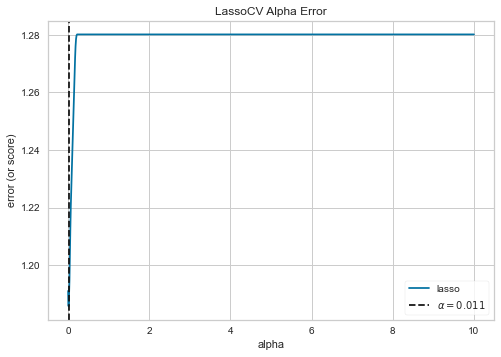

In [5]:
alphas = np.logspace(-10, 1, 400)

model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

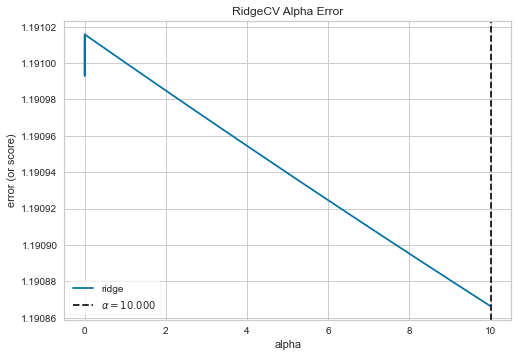

In [6]:
alphas = np.logspace(-10, 1, 400)

model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

----
## Prediction error


----

### Lasso CV

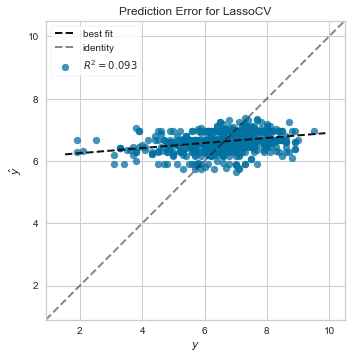

In [7]:
model = LassoCV(alphas=alphas)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Ridge CV

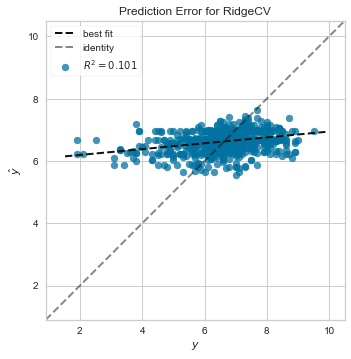

In [8]:
model = RidgeCV(alphas=alphas)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

----

## Residual plots

----

### LASSO 5-fold CV

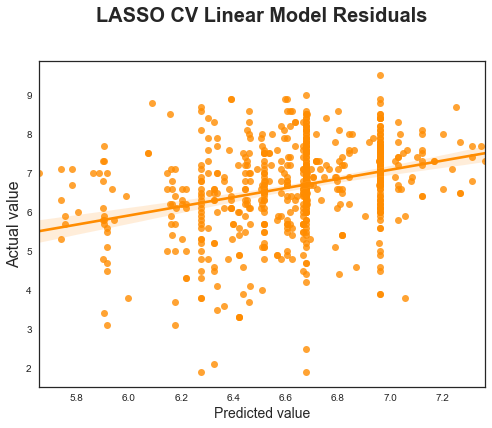

In [73]:
lasso_cv_5_fold = LassoCV(cv=5)
lasso_cv_5_fold.fit(X_train, y_train)             
train_set_pred_lasso = lasso_cv_5_fold.predict(X_train)
test_set_pred_lasso = lasso_cv_5_fold.predict(X_test)

plt.figure(figsize=(8, 6))
sns.set_style(style='white') 
# plt.scatter(test_set_pred, y_test, alpha=.1,  scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax = sns.regplot(x=test_set_pred_lasso, y=y_test, color="darkorange")
ax.set_title("LASSO CV Linear Model Residuals", fontsize=20, weight='bold', y=1.1)

plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('Actual value', fontsize=16)
plt.plot()
plt.savefig('residual-LASSO-linear', dpi=300, bbox_inches='tight')

### Ridge 5-fold CV

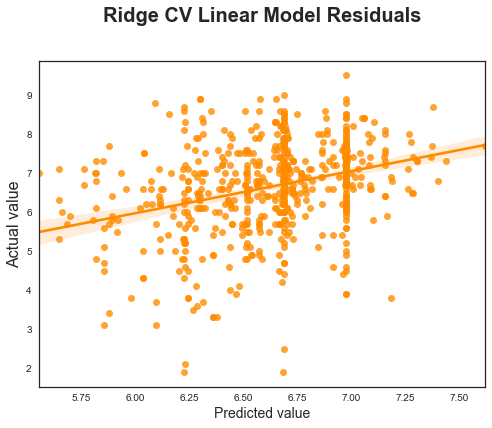

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

ridge_cv_5_fold = RidgeCV(cv=5)
ridge_cv_5_fold.fit(X_train, y_train)             
train_set_pred_lasso = ridge_cv_5_fold.predict(X_train)
test_set_pred_lasso = ridge_cv_5_fold.predict(X_test)

plt.figure(figsize=(8, 6))
sns.set_style(style='white') 
# plt.scatter(test_set_pred, y_test, alpha=.1,  scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax = sns.regplot(x=test_set_pred_lasso, y=y_test, color="darkorange")
ax.set_title("Ridge CV Linear Model Residuals", fontsize=20, weight='bold', y=1.1)

plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('Actual value', fontsize=16)
plt.plot()
plt.savefig('residual-ridge-linear', dpi=300, bbox_inches='tight')

----

## Residuals w/ Q-Q plot

----

### LASSO 5-fold CV

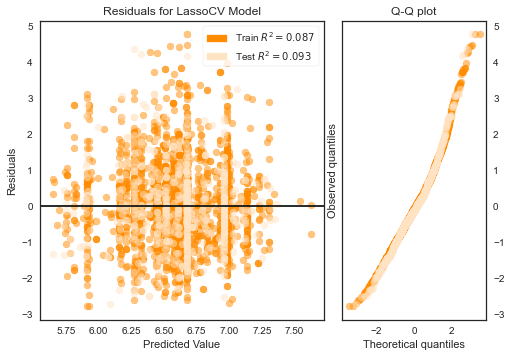

In [42]:
lasso_cv_5_fold = LassoCV(cv=5)
visualizer = ResidualsPlot(lasso_cv_5_fold, hist=False, qqplot=True, 
                           train_color='darkorange', test_color='bisque',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Score on our test data
visualizer.show()                         # Finalize and render the figure


### Ridge 5-fold CV

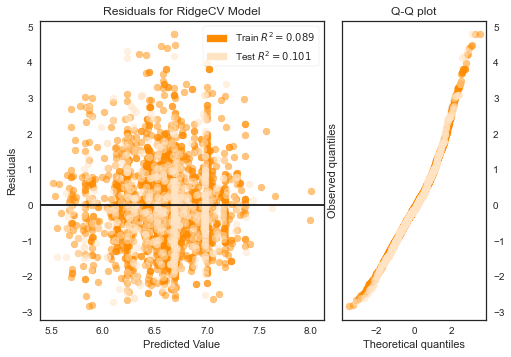

In [57]:
ridge_cv_5_fold = RidgeCV(cv=5)
visualizer = ResidualsPlot(ridge_cv_5_fold, hist=False, qqplot=True,
                          train_color='darkorange', test_color='bisque',
                        train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Score on our test data
visualizer.show()                         # Finalize and render the figure

----

## Residuals w/ histograms

---

### Lasso 5-fold CV

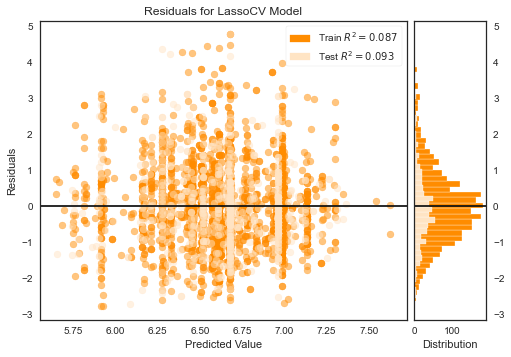

In [47]:
model = LassoCV(cv=5)
visualizer = ResidualsPlot(model, train_color='darkorange', test_color='bisque',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Score on our test data
visualizer.show()                             # Finalize and render the figure

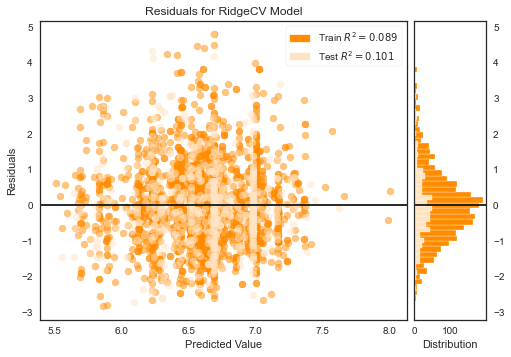

In [48]:
model = RidgeCV(cv=5)
visualizer = ResidualsPlot(model, train_color='darkorange', test_color='bisque',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Score on our test data
visualizer.show()                             # Finalize and render the figure

# Polynomial Regression

----

## Alpha selection not possible


----

----

## Prediction error

----

### Lasso CV

In [16]:
"""
model = LassoCV(alphas=alphas)
visualizer = PredictionError(model)
visualizer.fit(X_train_, y_train_)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test_)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
"""
print("Cannot predict LassoCV without CPU overload")

Cannot predict LassoCV without CPU overload


### Ridge CV

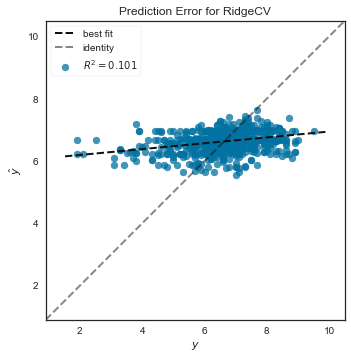

In [17]:
model = RidgeCV(alphas=alphas)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

----

## Residual plots

----

### Lasso 5-fold CV (polynomial reg)

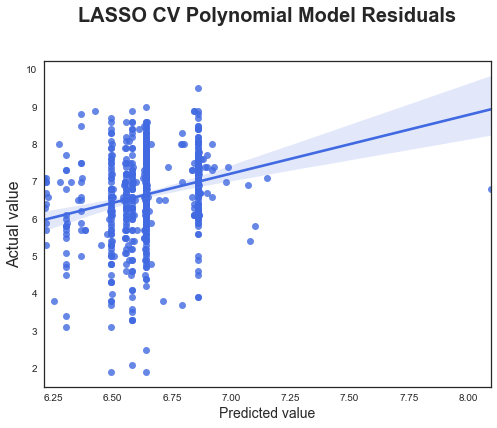

In [70]:
lasso_cv_5_fold = LassoCV(cv=5)
lasso_cv_5_fold.fit(X_train_, y_train_)             
train_set_pred_lasso = lasso_cv_5_fold.predict(X_train_)
test_set_pred_lasso = lasso_cv_5_fold.predict(X_test_)

plt.figure(figsize=(8, 6))
sns.set_style(style='white') 
# plt.scatter(test_set_pred, y_test, alpha=.1,  scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax = sns.regplot(x=test_set_pred_lasso, y=y_test_, color="royalblue")
ax.set_title("LASSO CV Polynomial Model Residuals", fontsize=20, weight='bold', y=1.1)

plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('Actual value', fontsize=16)
plt.plot()
plt.savefig('residual-LASSO-poly', dpi=300, bbox_inches='tight')

### Ridge 5-fold CV (polynomial reg)

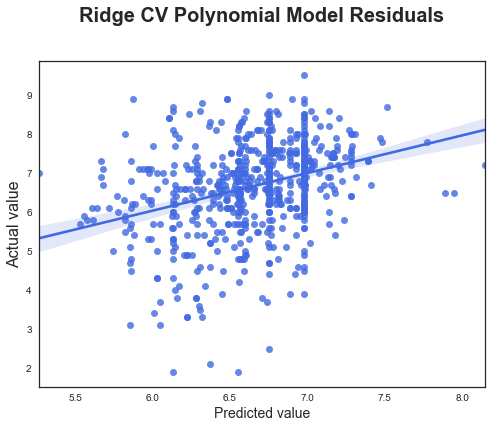

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

ridge_cv_5_fold = RidgeCV(cv=5)
ridge_cv_5_fold.fit(X_train_, y_train_)             
train_set_pred_lasso = ridge_cv_5_fold.predict(X_train_)
test_set_pred_lasso = ridge_cv_5_fold.predict(X_test_)

plt.figure(figsize=(8, 6))
sns.set_style(style='white') 
# plt.scatter(test_set_pred, y_test, alpha=.1,  scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax = sns.regplot(x=test_set_pred_lasso, y=y_test_, color="royalblue")
ax.set_title("Ridge CV Polynomial Model Residuals", fontsize=20, weight='bold', y=1.1)

plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('Actual value', fontsize=16)
plt.plot()
plt.savefig('residual-ridge-poly', dpi=300, bbox_inches='tight')

----

## Residuals w/ Q-Q plot (polynomial reg)

----

### Lasso 5-fold CV (poly)

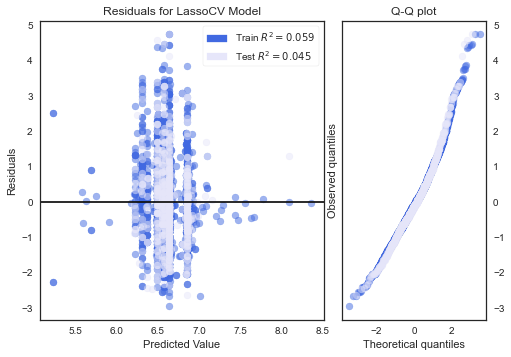

In [50]:
lasso_cv_5_fold = LassoCV(cv=5)
visualizer = ResidualsPlot(lasso_cv_5_fold, hist=False, qqplot=True,
                          train_color='royalblue', test_color='lavender',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train_, y_train_)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test_)  # Score on our test data
visualizer.show()                         # Finalize and render the figure

### Ridge 5-fold CV (poly)

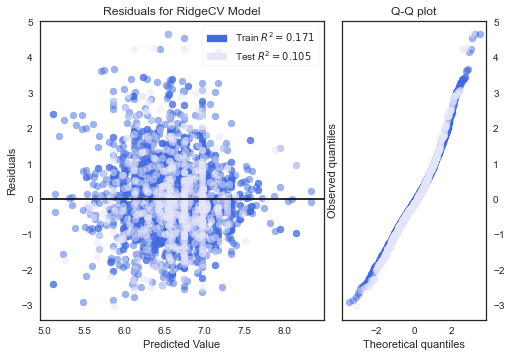

In [51]:
ridge_cv_5_fold = RidgeCV(cv=5)
visualizer = ResidualsPlot(ridge_cv_5_fold, hist=False, qqplot=True,
                          train_color='royalblue', test_color='lavender',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train_, y_train_)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test_)  # Score on our test data
visualizer.show()                         # Finalize and render the figure

----

## Residuals w/ histograms (poly)

---

### Lasso 5-fold CV (poly)

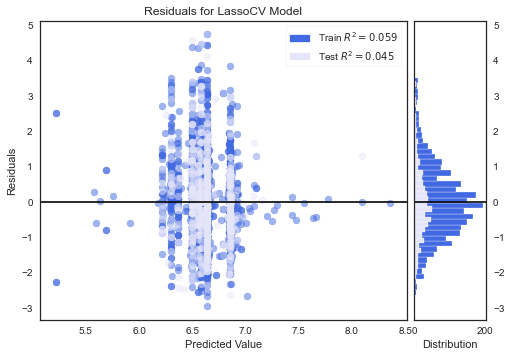

In [61]:
model = LassoCV(cv=5)
visualizer = ResidualsPlot(model, train_color='royalblue', test_color='lavender',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train_, y_train_)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test_)  # Score on our test data
visualizer.show()                             # Finalize and render the figure

### Ridge 5-fold CV (poly)

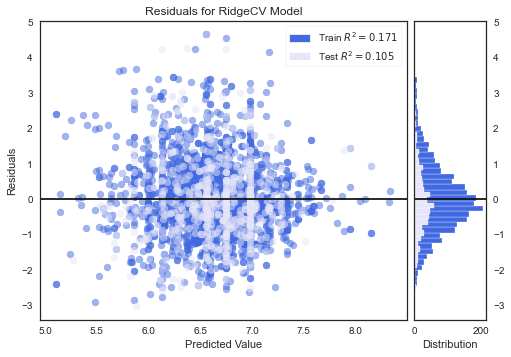

In [62]:
model = RidgeCV(cv=5)
visualizer = ResidualsPlot(model, train_color='royalblue', test_color='lavender',
                           train_alpha=0.5, test_alpha=0.5)
visualizer.fit(X_train_, y_train_)  # Fit the training data to the visualizer
visualizer.score(X_test_, y_test_)  # Score on our test data
visualizer.show()                             # Finalize and render the figure